Empalme con la clase anterior.



Hacemos el analisis de estabilidad y el codigo en `Python` en la proxima clase.o
Usamos Von Neumann

$$w_{ij} = \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} $$


El factor de Ganancia es

$$ G = \frac{w_{i j+1}}{w_{ij}} = \mathrm{e}^{\alpha \Delta t}$$

De forma que reemplazando en la Ecuacion (3)
$$-\beta \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_{i-1}} + (1 + 2 \beta) \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_i} -
\beta \mathrm{e}^{\alpha t_{j+1}} \mathrm{e}^{\mathrm{i} k x_{i+1}} =
\beta \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i-1}}  +
(1 - 2 \beta) \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i} +
\beta \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_{i+1}}  $$

Dividmos todo por $w_{ij} = \mathrm{e}^{\alpha t_j} \mathrm{e}^{\mathrm{i} k x_i}$

$$\beta G \mathrm{e}^{-\mathrm{i} k \Delta x} + (1 + 2 \beta) G - \beta G \mathrm{e}^{\mathrm{i} k \Delta x} = \beta \mathrm{e}^{-\mathrm{i} k \Delta x} + (1 - 2 \beta)  + \beta \mathrm{e}^{\mathrm{i} k \Delta x} $$

Depejamos $G$

$$G = \frac{1 - 2 \beta + 2 \beta \cos k \Delta x}{1 + 2 \beta - 2 \beta cos k \Delta x} = \frac{1 - 4 \beta \sin^2 \frac{k \Delta x}{2}}{1  + 4 \beta \sin^2 \frac{k \Delta x}{2} }  \le 1 $$


# Solución a la ecuación de calor: Método de Crank-Nicholson.

$$-\beta w_{i-1 j+1} + (1 + 2 \beta) w_{i j+1} - \beta w_{i+1 j+1} = \beta w_{i-1 \; j}  + (1 - 2 \beta) w_{ij} + \beta w_{i+1 j} $$

Vamos a implementar el Crank-Nicholson en `Python`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f):

    L = float(b-a)
    dx = L/(nx-1)
    beta = 0.5*alpha*dt/dx**2
    print("beta=", beta)

    tmax = t0 + nt*dt
    t = np.arange(t0,tmax,dt)

    # inicializamos w
    w = np.zeros((nx,nt))
    X = np.linspace(a,b,nx)

    # imprima dimensiones de w
    print("dimensiones de w", w.shape)

    # condiciones de frontera (Direchlet homogeneas)
    for j in range(nt):
        w[0,j] = 0
        w[nx-1,j] = 0

    # vector de la derecha
    rhs = np.zeros(nx-2)

    # inicializacion matrices A, B, vector b
    A = np.zeros((nx-2,nx-2))
    B = np.zeros((nx-2,nx-2))
    b = np.zeros(nx-2)


    # condicion inicial
    w[:,0]= f(X)

    # lleno de matrices A, B
    for i in range(0, nx-2):
        A[i,i] = 1 + 2.0*beta
        B[i,i] = 1 - 2.0* beta
        if i>0:
            A[i,i-1] = -beta
            B[i,i-1] =  beta
        if i<nx-3:
            A[i,i+1] = -beta
            B[i,i+1] = beta
    b[0]=beta*(w[0,1] + w[0,0] )
    b[nx-3]= beta*(w[nx-1,1] + w[nx-1,0] )

    # vector del lado derecho
    rhs = B.dot(w[1:-1,0]) + b

    # ciclo sobre tiempos
    for j in range (nt-1):

        # resulva A w = rhs
        x = np.linalg.solve(A,rhs)
        # w[1:-1,j+1] = x
        rhs = B.dot(x) + b

        # rotacion
        for i in range(nx-2):
            w[i+1, j+1] = x[i]

        b[0] = beta*(w[0,j+1] + w[0,j])
        b[nx-3] = beta*(w[nx-1,j] + w[nx-1,j+1])

    return w





In [ ]:
# prueba del algoritmo
alpha=1
a = 0
b = 1
nt=40001
nx=101
dt = 0.00001

t0=0
x0=0
L=b-a

# condicion inicial
def f(x):
    return 6*np.sin(np.pi*x/L)

w = solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f)


beta= 0.05
dimensiones de w (101, 40001)


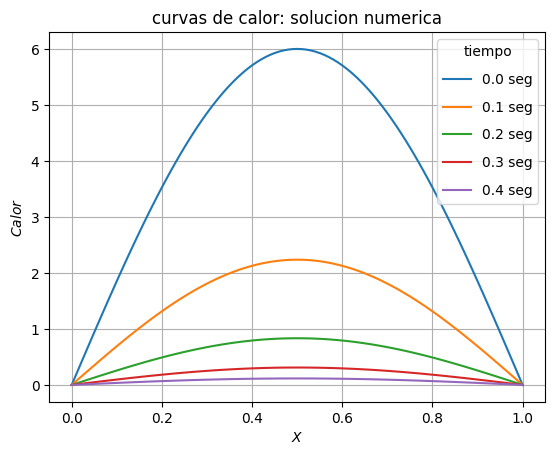

In [ ]:
# graficamos la solucion
params={'legend.fontsize':6, "legend.handlength":1}

Ndt=10000

# labels

plt.xlabel(r"$X$")
plt.ylabel(r"$Calor$")

# title
plt.title(r'curvas de calor: solucion numerica')

X = np.linspace(a,b, w.shape[0])

# ciclo de graficas
for j in range(0,nt, Ndt):
    t = t0 + j*dt
    plt.plot(X, w[:, j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")
plt.grid()
plt.show()

# Error con respecto a la solucion analitica

$$u(x,t) = 6 \sin \left (  \frac{\pi x}{L} \right ) \mathrm{e}^{-\frac{1}{\alpha} \left ( \frac{\pi}{L} \right )^2  t } $$

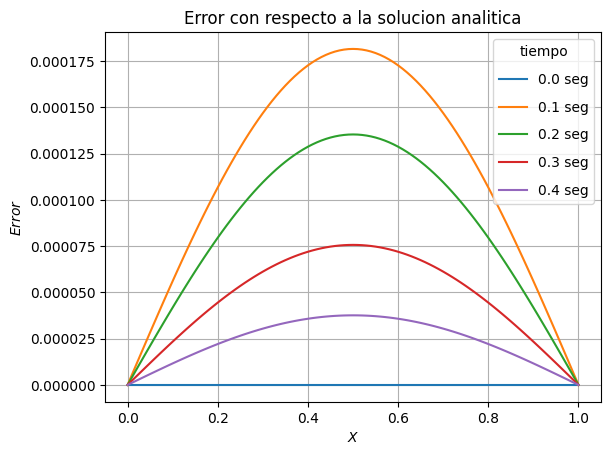

In [ ]:
# definamos la funcion analitica u(x,t)
def u(x,t):
    return 6*np.sin(np.pi*x/L)*np.exp((-1/(alpha)*(np.pi/L)**2)*t)

# incialice el vector w
nt=40001
dt=0.00001
Nt=int(nt/10000) + 1
dx = (b-a)/(nx-1)
error = np.zeros((nx, Nt))
a=0
b=1

k=0
nskip=10000
for j in range(0, nt, nskip):
    t = t0 + j*dt
    for i in range(nx):
        x = a+ i*dx
        error[i,k] = w[i,j] - u(x,t)
    k += 1

# graficamos el error
params = {'legend.fontsize':5, 'legend.handlength':1}

# labels
plt.xlabel(r'$X$')
plt.ylabel(r'$Error$')

# title
plt.title(r'Error con respecto a la solucion analitica')

X = np.linspace(a,b, w.shape[0])
Dt=0.1

# ciclo de graficas
for j in range(0,Nt):
    t = t0 + j*Dt
    plt.plot(X, error[:, j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")
plt.grid()
plt.show()



Mostramos que Crank-Nicholson es incondicionalmente estable. Pero saltos muy grandes en dt pueden generar errores mayores.

beta= 500.0
dimensiones de w (101, 5)


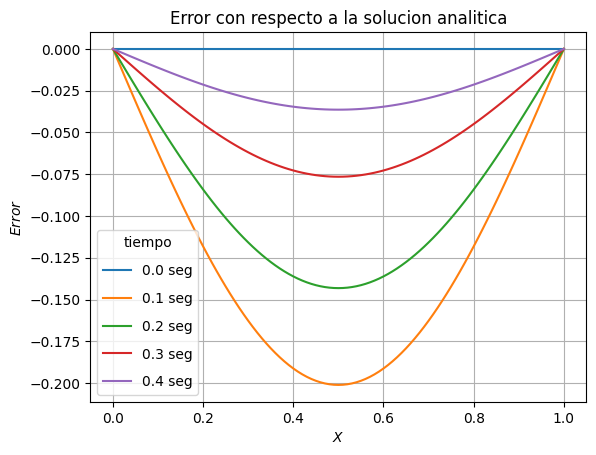

In [ ]:
# pensemos en dt=0.1
nt=5
dt=0.1
dx=(b-a)/(nx-1)
w = solu_eq_calor_CN(alpha, t0, a, b, nt, nx, dt, f)


# error
error = np.zeros((nx, nt))
a=0
b=1

k=0
for j in range(nt):
    t = t0 + j*dt
    for i in range(nx):
        x = a + i*dx
        error[i,k]= w[i,j] - u(x,t)
    k +=1

# graficamos el error
params = {'legend.fontsize':5, 'legend.handlength':1}

# etiquetas, labels
plt.xlabel(r'$X$')
plt.ylabel(r'$Error$')

# titulo
plt.title(r'Error con respecto a la solucion analitica')

X = np.linspace(a,b, w.shape[0])

# cicle
for j in range(0, Nt):
    t = t0 + j*dt
    plt.plot(X, error[:, j], label=str(round(t,1)) + ' seg')
    plt.legend(labelspacing=1, title="tiempo")

# finish, grid, show
plt.grid()
plt.show()


# Metodo de LeapFrog (salto de la rana)
La idea es por que no pensar que podemos usar **central en tiempo** y **central en espacio**?
Pensariamos que por que es central en ambas el error es
$$\mathcal{O}(\Delta x^2),  \mathcal{O}(\Delta t^2) $$

**Nota**: Yo escribo $\Delta x^2$ cuando lo legal es $(\Delta x)^2$
**Nota**: Yo escribo $\Delta t^2$ cuando lo legal es $(\Delta t)^2$

Veamos, en terminos de $w_{ij}$

$$\frac{w_{i j+1} - w_{i \;   j-1}}{2 \Delta t} = \alpha \frac{w_{i+1 \; j} - 2 w_{ij} + w_{i-1 \;  j}}{\Delta x^2} $$

De ac'a despejamos $w_{i \; j+1}$
si $\gamma  = \Delta t \alpha/(\Delta x)^2$

$$w_{i \; j+1} = 2 \gamma ( w_{i+1 j} - w_{ij} + w_{i-1 \; j}) + w_{i \; j-1}  $$


## Acerca de los nombres de los metodos.
Piense en la ecuacion

$$u_t = f(x,t) $$
Esta ecuacion se debe integrar (recuerde metodos numericos, metodos de Euler, Simpon, trapezoidal, Runge Kutta)
Pensemos que estamos en el intervalo $[t, t+ \Delta t]$

Podemos formular las siguientes aproximaciones de la integral
\begin{eqnarray}
\int_t^{t + \Delta t} f(x, \tau) d \tau &\approx& \Delta t f(x,t)
\quad , \quad \text{evaluacion en el lado izquierdo}  \\
\int_t^{t + \Delta t} f(x, \tau) d \tau &\approx& \Delta t f(x,t+\Delta t)
\quad , \quad \text{evaluaci'on en el punto derecho} \\
\int_t^{t + \Delta t} f(x, \tau) d \tau &\approx&
\frac{\Delta t}{2} ( f(x,t) + f(x, t+ \Delta t)) \quad , \quad
\text{promedio de las dos anteriores} \\
\int_t^{t + \Delta t} f(x, \tau) d \tau &\approx& \Delta t f(x, t + \Delta t/2)
\end{eqnarray}
Veamos esto de forma gr'afica






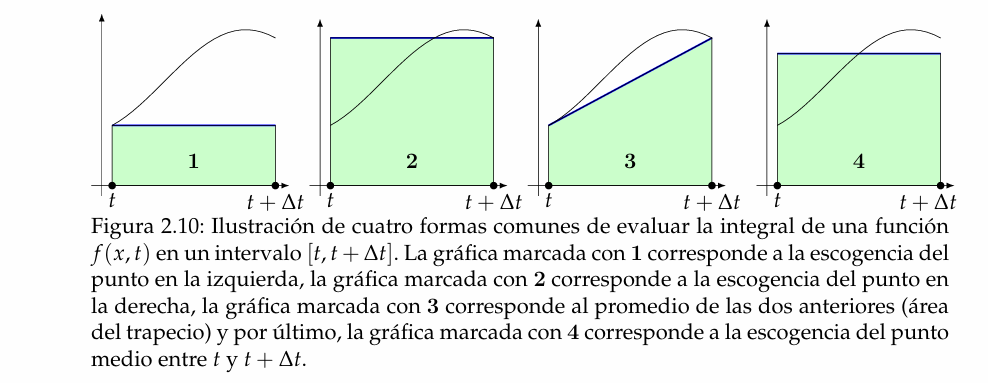

Del teorema fundamental del calculo

$$\int_t^{t + \Delta t} u_t(x,\tau) d \tau = u(x, t+\Delta x) - u(x,t) $$

Podemos escribir la derivada de muchas formas

\begin{eqnarray}
\frac{u(x, t+ \Delta x)- u(x,t)}{\Delta t} &\approx& f(x,t) \quad , \quad \text{FTCS} \\
\frac{u(x, t+ \Delta x)- u(x,t)}{\Delta t} &\approx& f(x,t+\Delta t) \quad , \quad \text{BTCS} \\
\frac{u(x, t+ \Delta x)- u(x,t)}{\Delta t} &\approx& \frac12 ( f(x,t) + f(x, t+ \Delta t) \quad , \quad \text{Crank-Nicholson} \\
\frac{u(x-\Delta t/2, t+ \Delta x/2)- u(x,t)}{\Delta t} &\approx& f(x, t + \Delta t/2) \quad , \quad \text{Leapfrog}
\end{eqnarray}

Las integraciones 1,2,3,4 nos dan nombres

1. **Euler progresivo**
2. **Euler regresivo**
3. **trapezoidal**

# Seccion Nueva: Ecuaciones hiperbolicas. Onda.
## Una dimension

$$\frac{\partial^2 u}{\partial x^2} - \frac{1}{c^2(x)} \frac{\partial^2 u}{\partial t^2} = - g(x,t)$$
Por que el termino de la fuente es negativo? Lo explico en la segunda parte de la clase.

Asumimos una cuerda en el intervalo $[a,b]$
* **condiciones de frontera**
$$u(a,t) = e(t) \quad , \quad u(b,t) = f(t) $$
* **condiciones iniciales**
$$u(x,t_0) =  p(x) \quad , \quad u_t(x,t_0) = q(x) $$

En esta ecuacion $c=c(x)$ es la velocidad de propagaci'on de la onda. Puede ser variable.

Vamos a usar para empezar el sistema de derivadas parciales centradas tanto en tiempo como en espacio.

Recuerde
$[a,b]$ se parte en $x_0=a, x_1=a + \Delta x, \cdots x_i=a+i \Delta x$ etc.
$t_j=t_0 + j \Delta t$ para $g$
$$g_{ij} = g(x_i, t_j) $$

El sistema queda:
$c(x_i)= c_i$


$$\frac{w_{i+1 \; j} - 2 w_{ij} + w_{i-1 \; j}}{\Delta x^2} -\frac{1}{c_i^2}
\frac{w_{i \; j+1} - 2 w_{ij} + w_{i \; j-1}}{\Delta t^2}= -g_{ij} \tag{0} $$
donde
$$g_{ij}= g(x_i, t_j) $$



Esta ecuacion tiene error del orden $\mathcal{O}(\Delta x^2)$ y $\mathcal{O}(\Delta t^2)$.

* **condiciones de frontera**
$$u_{0j} = e(t_j)=e_j \quad, \quad u_{nx \; j}=f(t_j) = f_j $$

* **condiciones iniciales**
$$w_{i0} = p(x_i) = p_i \quad , \quad u_t(x, t_0) =q(x)$$
De la segunda condicion

$$u_t(t=0) \approx \frac{w_{i1} - w_{i \; -1}}{2 \Delta t} = q(x) + \mathcal{O}(\Delta x^2) $$

De aca aproximamos

$$w_{i \; -1} = w_{i1} - 2 q_i \Delta t \tag{1} $$

De la Ecuaci'on (0) vamos a despejar $w_{i j+1}$
Llamando $\gamma_i=c_i \Delta t/\Delta x$

Si en la Ecuacion (0)  multiplicamos todo por $c_i \Delta t^2$ encontramos

$$\gamma_i^2 ( w_{i+1 \; j} -2 w_{ij} + w_{i-1 \; j}) - (w_{i \; j+1} - 2 w_{ij}  +  w_{i \; j-1}) =- g_{ij} c_i^2 \Delta t^2$$

Cambiamos signos
$$- \gamma_i^2 ( w_{i+1 \; j} -2 w_{ij} + w_{i-1 \; j}) + (w_{i \; j+1} - 2 w_{ij}  +  w_{i \; j-1}) = g_{ij} c_i^2 \Delta t^2$$

$$-\gamma_i^2 w_{i+1 \; j} + 2 \gamma_i^2 w_{ij} - \gamma_i^2 w_{i-1 \; j} + w_{i \; j+1} - 2 w_{ij} + w_{i \; j-1} = g_{ij} c_i^2 \Delta t^2$$

Despejamos $w_{i j+1}$

$$w_{i \; j+1} = \gamma_i^2 w_{i-1 \; j} + (2 - 2 \gamma_i^2)w_{ij}  - \gamma_i^2 w_{i+1 \; j}   - w_{i j-1} + g_{ij} c_i^2 \Delta t^2$$


$$w_{i \; j+1} = \gamma_i^2 w_{i-1 \; j} + 2(1 - \gamma_i^2)w_{ij}  + \gamma_i^2 w_{i+1 \; j}   - w_{i j-1} + g_{ij} c_i^2 \Delta t^2 \tag{2}$$

Observe que el signo de $g$ ahora es positivo. Es importante el signo de la fuente por que si empujamos hacia abajo, esperamos que el sistema se mueva hacia abajo. Asumiendo total reposo. Los detalles de por que no los vemos. se ven cuando se resuelve la ecuacion.

Note que la ecuacion de onda se pudo haber escrito como

$$\frac{\partial^2 u}{\partial t^2} - c^2(x) \frac{\partial^2 u}{\partial x^2} = c^2 g(x,t) $$

La estrella (estencil, plantilla, molecula) se muestra en la Figura 2.11





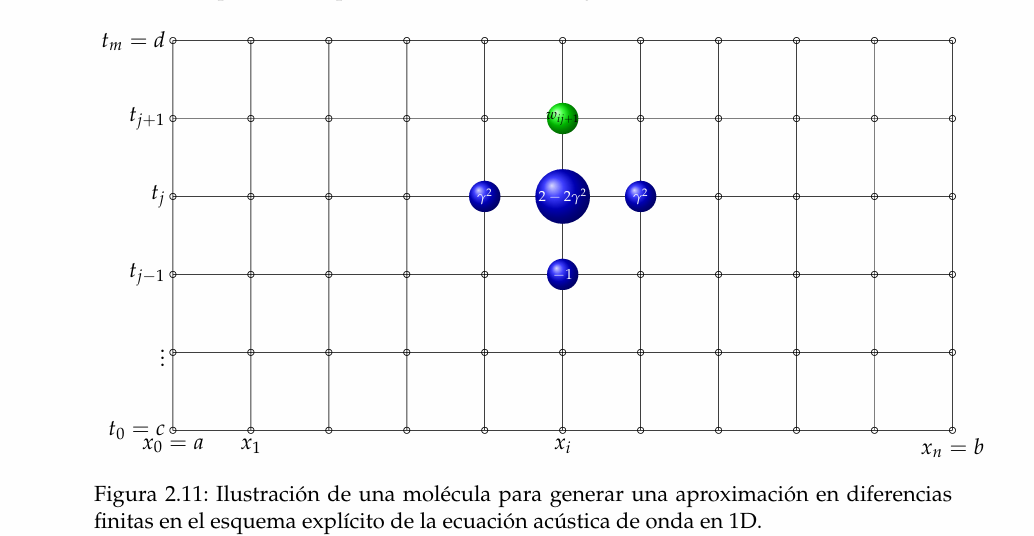

Si fueramos a hacer analisis de estabilidad tendriamos que calcular el factor de Ganancia

$$G= \frac{w_{i \; j+1}}{w_{ij}} $$
Mas tarde usaos esta expresion.

### Forma matricial
De las condiciones de frontera tenemos

$$w_{0 j} = e(t_j) = e_j \quad , \quad w_{nx \; j} = f(t_j) = f_j $$

Queremos hallar $w_{ij}$ para $i=1, nx-1$, $j=0,1, \cdots , nt$
Comenzamos con $j=0$ en la Ecuacion (2)

$$w_{i \; j+1} = \gamma_i^2 w_{i-1 \; j} + 2(1 - \gamma_i^2)w_{ij}  + \gamma_i^2 w_{i+1 \; j}   - w_{i j-1} + g_{ij} c_i^2 \Delta t^2 \tag{2} $$


$$w_{i \; 1} = \gamma_i^2 w_{i-1 \; 0} + 2(1 - \gamma_i^2)w_{i0}  + \gamma_i^2 w_{i+1 \; 0}   - w_{i \; -1} + g_{i0} c_i^2 \Delta t^2 $$

El problema es que no conocemos $w_{i \; -1}$ pero podemos usar la Ecuacion (1)


$$w_{i \; 1} = \gamma_i^2 w_{i-1 \; 0} + 2(1 - \gamma_i^2)w_{i0}  + \gamma_i^2 w_{i+1 \; 0}   - w_{i1} + 2 q_i \Delta t + g_{i0} c_i^2 \Delta t^2 $$

Tengo que recojer $w_{i \; 1}$ pasando a la izquierda el de la derecha

$$2 w_{i \; 1} = \gamma_i^2 w_{i-1 \; 0} + 2(1 - \gamma_i^2)w_{i0}  + \gamma_i^2 w_{i+1 \; 0}  + 2 q_i \Delta t + g_{i0} c_i^2 \Delta t^2 $$

Divido por 2
$$ w_{i \; 1} = \frac12 \gamma_i^2 w_{i-1 \; 0} + (1 - \gamma_i^2)w_{i0}  + \frac12 \gamma_i^2 w_{i+1 \; 0}  +  q_i \Delta t + \frac12 g_{i0} c_i^2 \Delta t^2 $$

Volviendo 2 con $i=1$
$$w_{1 \; j+1} = \gamma_i^2 w_{0 \; j} + 2(1 - \gamma_i^2)w_{1j}  + \gamma_i^2 w_{2 \; j}   - w_{1 j-1} + g_{1j} c_i^2 \Delta t^2  $$

$$w_{1 \; j+1} =  + 2(1 - \gamma_i^2)w_{1j}  + \gamma_i^2 w_{2 \; j}   - w_{1 j-1} + g_{1j} c_i^2 \Delta t^2  + \gamma_0^2 w_{0j}$$

Para el otro valor de frotera $nx$ volveos a copiar la Ecuacion (2
$i=nx-1=n-1$
$$w_{n-1 \; j+1} = \gamma_i^2 w_{n-2 \; j} + 2(1 - \gamma_{n-1}^2)w_{n-1 \; j}  + \gamma_{n-1}^2 w_{n \; j}   - w_{n-1 j-1} + g_{n-1 \; j} c_{n-1}^2 \Delta t^2 $$

$$w_{n-1 \; j+1} = \gamma_i^2 w_{n-2 \; j} + 2(1 - \gamma_{n-1}^2)w_{n-1 \; j}     - w_{n-1 j-1} + g_{n-1 \; j} c_{n-1}^2 \Delta t^2  + \gamma_{n-1}^2 w_{nj} $$

El sitema queda como

<span style="font-size: 10px;">





$$
\begin{pmatrix}
w_{1 j+1} \\
w_{2 j+1} \\
\vdots \\
\vdots \\
w_{n-1 \; j+1}
 \end{pmatrix}
=
\begin{pmatrix}
2(1 - \gamma_1^2) & \gamma_1^2  & 0 & \cdots & \cdots & 0 \\
\gamma_2^2 & 2(1 - \gamma_2^2) & \gamma_2^2 & \ddots & \ddots  & \vdots \\
0 & \ddots & \ddots & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & \gamma_{n-2}^2 & 2(1 - \gamma_{n-2}^2) & \gamma_{n-2}^2 \\
0 & \cdots & \cdots & 0 & \gamma_{n-1}^2 & 2(1 - \gamma_{n-1}^2
\end{pmatrix}
\begin{pmatrix}
w_{1j} \\
w_{2j} \\
\vdots \\
\vdots \\
w_{n-1 \; j}
\end{pmatrix}
-
\begin{pmatrix}
w_{1 \; j-1}  \\
w_{2 \; j-1}  \\
\vdots \\
\vdots \\
w_{n-1 \; j-1}  \\
\end{pmatrix}
+ \Delta t^2
\begin{pmatrix}
g_{1j} c_1^2 \\
g_{2j} c_2^2 \\
\vdots \\
\vdots \\
g_{n-1 \; j} c_{n-1}^2 \\
\end{pmatrix}
+
\begin{pmatrix}
\gamma_1^2 w_{0j} \\
0 \\
\vdots \\
0 \\
\gamma_{n-1}^2 w_{nj}
\end{pmatrix}
$$



# Proxima clase. Analisis de estabilidad para wave equation. Numero CFL.